In [3]:
import sympy as sp
# подсказка по интегралам 
# https://mathdf.com/int/ru/

**Упражнение 1**  
Вычислите предел последовательности при $n \longrightarrow \infty$  : 
<font size='4'>
$$
S_n = \frac{7 n^{10} + 2 n^{6} + 2 n + \frac{1}{n}}{2 n^{10} + 3 n^{6} + 9}
$$</font>

In [4]:
n = sp.symbols('n')
s_n = (7*n**10 + 2*n**6 + 2*n + 1/n) / (2*n**10 + 3*n + 9); s_n

(7*n**10 + 2*n**6 + 2*n + 1/n)/(2*n**10 + 3*n + 9)

In [5]:
sp.limit(s_n, n, sp.oo)

7/2

**Упражнение 2**  
Покажите, что эти две функции являются ассимтотическими друг другу при $x \longrightarrow 0$  
<font size='4'>$g(x) = x^{2} \left(e^{x} - 1\right)$</font>    
<font size='4'>$f(x) = x^{5} e^{x} + 2 x^{4} + x^{3}$</font>  

In [6]:
from sympy.plotting import plot

In [7]:
x = sp.symbols('x')
g_x = x ** 2 * (sp.exp(x) - 1); g_x

x**2*(exp(x) - 1)

In [8]:
f_x = x**5*sp.exp(x) + 2*x**4 + x**3;f_x

x**5*exp(x) + 2*x**4 + x**3

In [9]:
sp.limit(g_x/f_x, x, 0)

1

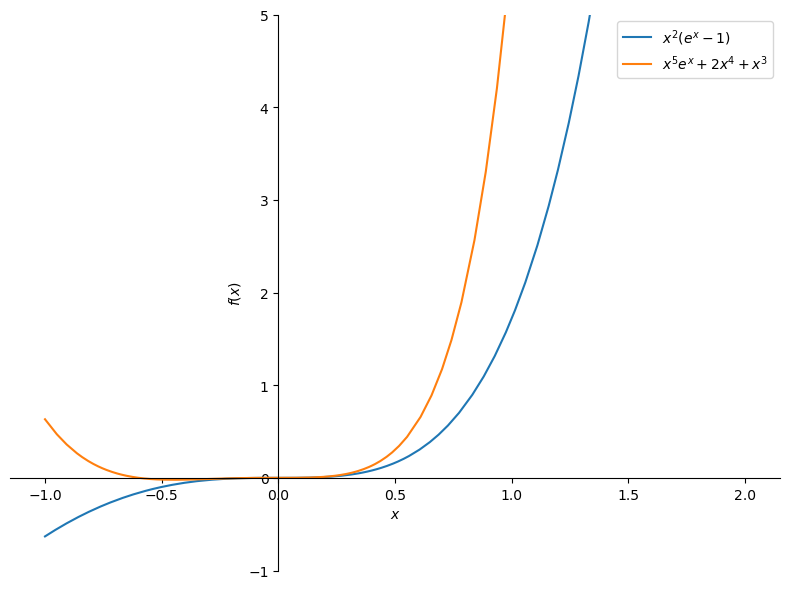

In [11]:
plot(g_x, f_x, (x, -1, 2), ylim=(-1,5), size=(8,6), legend=True);

**Упражнение 3**  
Напишите код для аппроксимации следующего интеграла относительно дифференциала, используя 20 прямоугольников(N):
<font size='4'>$$
\int_{-1}^{1} cos(x^3)\,dx
$$</font>

In [31]:
f3 = sp.cos(x**3)
f3

cos(x**3)

In [32]:
res = sp.integrate(f3, (x, -1, 1))

In [33]:
res.evalf()

1.86340888118309

In [35]:
import numpy as np

In [53]:
a = -1; b = 1; N = 20

In [54]:
x_range = np.linspace(a, b, N + 1)
dx = (b - a) / N
x_range.size

21

In [55]:
x_range[1] - x_range[0]

np.float64(0.09999999999999998)

In [56]:
# Variant 1
sq = np.sum(np.cos(x_range ** 3) * dx)
sq

np.float64(1.9132351047296046)

In [57]:
# Variant 2
summa = 0
for i in x_range:
    summa += sp.cos(i ** 3) * dx
summa

1.91323510472960

In [58]:
res.simplify()

2*hyper((1/6,), (1/2, 7/6), -1/4)

In [45]:
from sympy import Eq, plot_implicit

In [46]:
x1, x2 = sp.symbols('x1, x2')

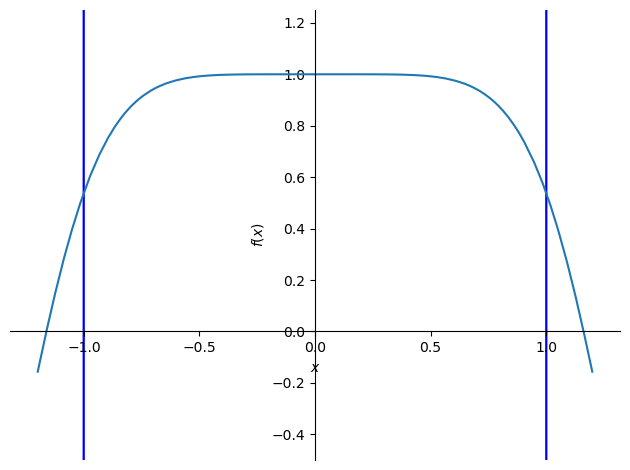

In [48]:
p1 = sp.plot(f3, (x, -1.2, 1.2), show=False, ylim=(-0.5, 1.25))
p2 = plot_implicit(Eq(x1, -1), show=False)
p3 = plot_implicit(Eq(x1, 1), show=False)
p1.append(p2[0])
p1.append(p3[0])
p1.show()

In [59]:
import matplotlib.pyplot as plt

In [60]:
def integral(a, b, func, N):
    x_range = np.linspace(a, b, N + 1)
    dx = (b - a) / N
    return np.sum(func(x_range) * dx)

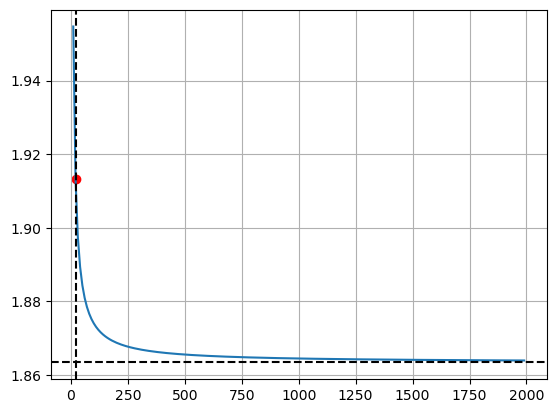

In [61]:
N_range = range(10, 2000, 10)
plt.plot(N_range, [integral(a, b, lambda x: np.cos(x**3), N) for N in N_range])
plt.axhline(1.86340888118309, c = "k", ls="--")
plt.axvline(20, c = "k", ls="--")
plt.scatter(20, 1.9132351047296046, c='r')
plt.grid();

 **Упражнение 4**  
 Вычислить производную следующей функции:
 <font size='4'>$$
 f(x) = e^{-\alpha(x)}sin(\omega(x)x + C)
$$ </font>  
где $\alpha(x)$ и $\omega(x)$ - это произвольные функции, $C$ - это действительное число

In [65]:
C = sp.symbols("C", real=True)
alpha = sp.Function('alpha')
omega = sp.symbols('omega', cls=sp.Function)

fx4 = sp.exp(-alpha(x)) * sp.sin(omega(x) * x + C)
fx4

exp(-alpha(x))*sin(C + x*omega(x))

In [66]:
fx4.diff(x)

(x*Derivative(omega(x), x) + omega(x))*exp(-alpha(x))*cos(C + x*omega(x)) - exp(-alpha(x))*sin(C + x*omega(x))*Derivative(alpha(x), x)

**Упражнение 5**  
Вычислить интеграл:  
<font size='4'>$$
\int_{0}^{\frac{\pi}{2}} cos(x)sin(x)e^{sin(x)}\,dx
$$</font>

In [68]:
fx5 = sp.cos(x) * sp.sin(x) * sp.exp(sp.sin(x))
fx5

exp(sin(x))*sin(x)*cos(x)

In [69]:
res = sp.integrate(fx5, (x, 0, sp.pi/2));res

1

In [70]:
import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

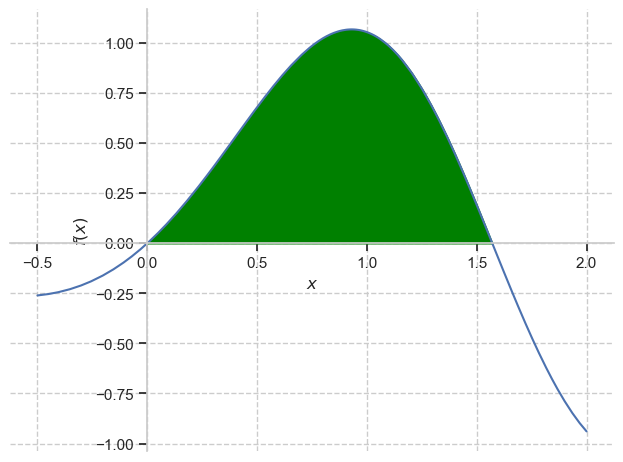

In [72]:
x_array = np.linspace(0, np.pi / 2, 1000)
f_array = sp.lambdify(x, fx5)(x_array)
sp.plot(fx5, (x, -0.5, 2), fill={'x': x_array,'y1':f_array,'color':'green'});

In [77]:
Fx5 = sp.integrate(fx5)
Fx5

exp(sin(x))*sin(x) - exp(sin(x))

In [76]:
result = Fx5.subs({"x": sp.pi / 2}) - Fx5.subs({"x": 0})
result

1